Convolutional Neural Networks
<img src="CNN.jpeg" height="600" width="600">

In [55]:
#To find the data go: https://www.kaggle.com/paultimothymooney/repository-of-coronavirus-genomes

In [1]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [52]:

#C:/Users/Mamun/Desktop/Workshop23April/Artificial-Intelligence-kick-Start-Workshop/chest_xray/test
training_data=[]
DATADIR_train = "C:/Users/Mamun/Desktop/Workshop23April/Artificial-Intelligence-kick-Start-Workshop/chest_xray/test"
CATEGORIES = ["NORMAL", "PNEUMONIA"]

# Visualization

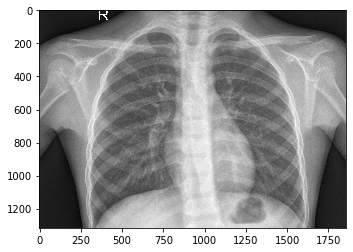

In [54]:
for category in CATEGORIES:  
    path = os.path.join(DATADIR_train,category)  
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break  

# Load the dataset

In [3]:
#here we define a function which will extract data from image

import os
import cv2
import random


def create_data(t_data,DATADIR,CATEGORIES):
    try:
        for category in CATEGORIES:  # "Normal" and "pneumonia"

            path = os.path.join(DATADIR,category)  # join the path of "Normal" and "pneumonia"
            class_num = CATEGORIES.index(category) #get the classification  (0 or a 1). 0=Normal, 1=pneumonia


            for img in os.listdir(path):  # iterate over each image per "Normal" and "pneumonia" image
                    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                    new_array = cv2.resize(img_array, (100, 100))  # resize to normalize data size,here 100px X 100px
                    t_data.append([new_array, class_num])  # add this to our training_data
    except:
        print("There is some problem with folder directory or folder loading data from folder")
    
    random.shuffle(t_data) #We want to shuffle our data



In [4]:
create_data(training_data,DATADIR_train,CATEGORIES)
#training_data[0]
#training_data

In [5]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, 100, 100, 1))# image size 100 into 100

X = np.array(X).reshape(-1, 100, 100, 1)#scaling or mapping data to -1 to 1
y=np.array(y)

In [6]:
type(X)

numpy.ndarray

In [7]:
type(y)

numpy.ndarray

In [56]:
#if ur data is very big then u run this block of code, this block of code compress ur data and create file, so that
#in future u can access ur data only just calling ur compress dataset.
#If ur dataset is big and u run this block, then after running this block u restart ur kernel or ur compiler 
#


#import pickle

#pickle_out = open("X.pickle","wb")
#pickle.dump(X, pickle_out)
#pickle_out.close()

#pickle_out = open("y.pickle","wb")
#pickle.dump(y, pickle_out)
#pickle_out.close()

#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

# For AI Training

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [57]:
#if you compress data previously then only then u run this block of code

#import compress data file data file


#import pickle

#pickle_in = open("X.pickle","rb")
#X = pickle.load(pickle_in)

#pickle_in = open("y.pickle","rb")
#y = pickle.load(pickle_in)

In [9]:
X = X/255.0 #normalize data between 0 to 1, so that CNN model can work well

# Create Model

In [12]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [13]:
#model.summary()

# Compile The ANN Model

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train

In [15]:
#model.fit(X, y, batch_size=20, epochs=1) #if ur data is big then use this line and increase the batch_size if u want
model.fit(X, y,batch_size=20, epochs=3,validation_split=0.3)

Train on 436 samples, validate on 188 samples
Epoch 1/3
436/436 [==============================] - 47s 108ms/sample - loss: 1.4735 - accuracy: 0.6124 - val_loss: 0.6205 - val_accuracy: 0.6383
Epoch 2/3
436/436 [==============================] - 45s 103ms/sample - loss: 0.5448 - accuracy: 0.6972 - val_loss: 0.3409 - val_accuracy: 0.8564
Epoch 3/3
436/436 [==============================] - 45s 103ms/sample - loss: 0.3471 - accuracy: 0.8555 - val_loss: 0.3940 - val_accuracy: 0.8032


# Evaluate if someone have Corona

In [45]:
#img_path="C:/Users/Mamun/Desktop/Workshop23April/Artificial-Intelligence-kick-Start-Workshop/chest_xray/val/NORMAL/2.jpeg"
img_path="C:/Users/Mamun/Desktop/Workshop23April/Artificial-Intelligence-kick-Start-Workshop/chest_xray/val/PNEUMONIA/1.jpeg"


In [46]:
#Load image using pillow
from PIL import Image
img = Image.open(img_path)
#img #To see image uncomment this line
#convert image to numpy array which is loaded before
data = np.asarray(img)      
data
type(data)

numpy.ndarray

In [47]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img=cv2.resize(img, (100, 100))   
img=img.reshape(-1, 100, 100, 1)
type(img)

numpy.ndarray

In [48]:
prediction = model.predict([img])
a=prediction
b=[[0]]

if a==b:
    print("Model Predicted this person x-ray image as Normal and no Corona Virus")
elif a>b:
    print("Model Predicted this person x-ray image as pneumonia and strong probaility of Corona Virus")
else:
    print("Something is wrong, Please try again !!")
    

Model Predicted this image as pneumonia and strong probaility of Corona Virus


In [38]:
#prediction = model.predict([img]) 

In [50]:
#a=prediction
#a

In [32]:
#b=[[0]]

In [49]:
#a > b